# <font color='blue'>Algoritmos de Clusterização</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
plotlyVersion = !pip show plotly
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Plotly", plotlyVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Plotly Version: 5.9.0
Sklearn Version: 1.2.2


## Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O objetivo deste problema de negócio é a segmentação de consumidores para campanhas customizadas de marketing. Ou seja, uma empresa fictícia deseja agrupar seus clientes com  características semelhantes e a partir destes grupos direcionar campanhas personalizadas. Essa empresa possui um conjunto de dados de seus clientes, mas não  sabe quais são os grupos de clientes com características semelhantes. Ao agrupar os clientes em grupos com características semelhantes, a empresa pretende adotar campanhas específicas de acordo com a idade, ou salário, ou perfil de compras, por exemplo. Como resultado, a empresa pretende aumentar as suas vendas e fidelizar seus consumidores.<br>
Lembrando que um problema de clusterização é **não supervisionado**, ou seja, não existe uma variável de saída ou uma variável alvo. Nós temos apenas os dados de entrada, ou seja, as variáveis preditoras. <br>
Em um projeto de clusterização, inicialmente o cientista de dados deve fazer uma análise exploratória buscando entender os dados e encontrar eventuais grupos. Em seguida, deve utilizar técnicas que o ajude a encontrar o melhor valor de k, ou seja, a melhor quantidade de grupos. Na sequência, deve-se entregar os dados aos algoritmos de aprendizado de máquina, para que seja feita a segmentação em grupos. O cientista de dados escolherá o modelo que fez o melhor agrupamento e por fim, fará uma análise exploratória considerando os grupos, com o objetivo de gerar relatórios para os tomadores de decisão da empresa.

</details>

In [2]:
# Carregando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import math

# Esse módulo ignara os avisos.
import warnings
warnings.filterwarnings("ignore")

## Coletando os dados

In [3]:
# Coletando os dados 
df = pd.read_csv('Dados/Clientes/dados_clientes.csv')
df

IDCliente       Sexo  Idade  Salario_Mensal_Milhar  Pontuacao_Gasto
0            1  Masculino     19                     15               39
1            2  Masculino     21                     15               81
2            3   Feminino     20                     16                6
3            4   Feminino     23                     16               77
4            5   Feminino     31                     17               40
..         ...        ...    ...                    ...              ...
195        196   Feminino     35                    120               79
196        197   Feminino     45                    126               28
197        198  Masculino     32                    126               74
198        199  Masculino     32                    137               18
199        200  Masculino     30                    137               83

[200 rows x 5 columns]

In [4]:
# Excluindo coluna
df = df.drop(["IDCliente"], axis=1)
df

Sexo  Idade  Salario_Mensal_Milhar  Pontuacao_Gasto
0    Masculino     19                     15               39
1    Masculino     21                     15               81
2     Feminino     20                     16                6
3     Feminino     23                     16               77
4     Feminino     31                     17               40
..         ...    ...                    ...              ...
195   Feminino     35                    120               79
196   Feminino     45                    126               28
197  Masculino     32                    126               74
198  Masculino     32                    137               18
199  Masculino     30                    137               83

[200 rows x 4 columns]

## Explorando os dados

In [5]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sexo                   200 non-null    object
 1   Idade                  200 non-null    int64 
 2   Salario_Mensal_Milhar  200 non-null    int64 
 3   Pontuacao_Gasto        200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# Sumário estatístico
df.describe()

Idade  Salario_Mensal_Milhar  Pontuacao_Gasto
count  200.000000             200.000000       200.000000
mean    38.850000              60.560000        50.200000
std     13.969007              26.264721        25.823522
min     18.000000              15.000000         1.000000
25%     28.750000              41.500000        34.750000
50%     36.000000              61.500000        50.000000
75%     49.000000              78.000000        73.000000
max     70.000000             137.000000        99.000000

In [7]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira é igual a outra
df.duplicated().sum()

0

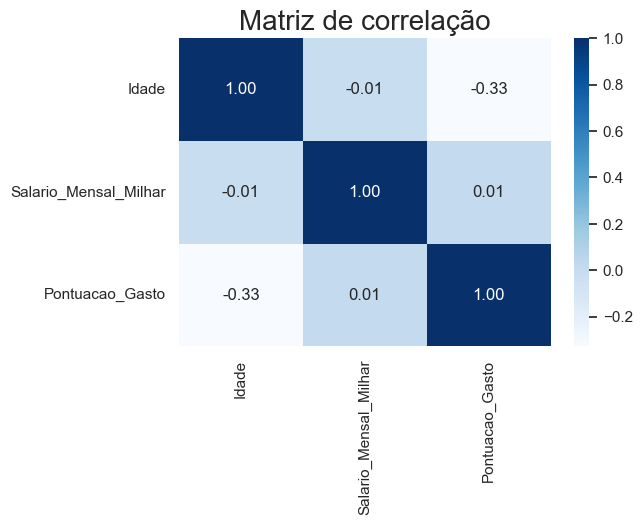

In [8]:
# Matriz de correlação utilizando Seaborn
sns.set(rc = {'figure.figsize':(6,4)}) # define o tamanho do gráfico
sns.heatmap(df[["Idade", "Salario_Mensal_Milhar", "Pontuacao_Gasto"]].corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

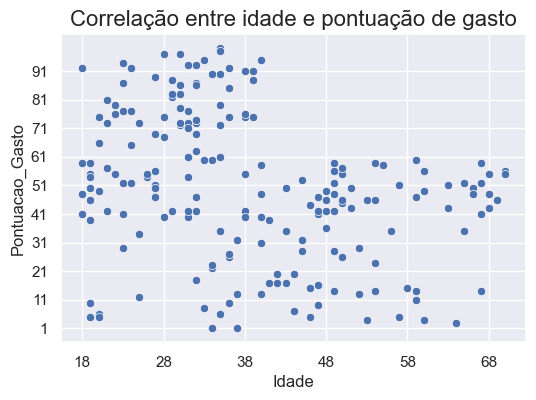

In [9]:
# Correlação entre idade e pontuação de gasto
sns.set_theme(style="darkgrid") # Define o tema utilizado.

ax = sns.scatterplot(x=df.Idade, y=df.Pontuacao_Gasto) # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
ax.set_title("Correlação entre idade e pontuação de gasto", fontsize = 16)
ax.set_xticks(np.arange(df.Idade.min(), df.Idade.max(), 10))
ax.set_yticks(np.arange(df.Pontuacao_Gasto.min(), df.Pontuacao_Gasto.max(), 10))
plt.show()

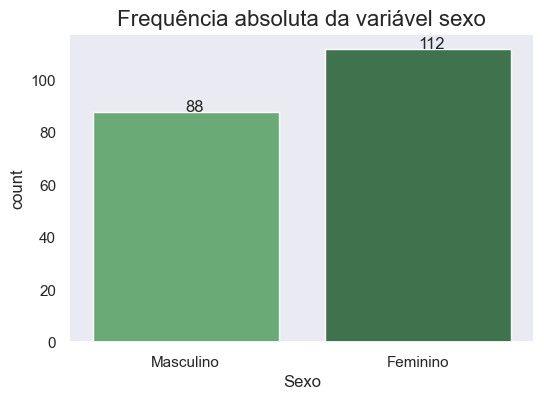

In [10]:
# Countplot da variável sexo
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=df["Sexo"], palette = "Greens_d");
ax.set_title("Frequência absoluta da variável sexo", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

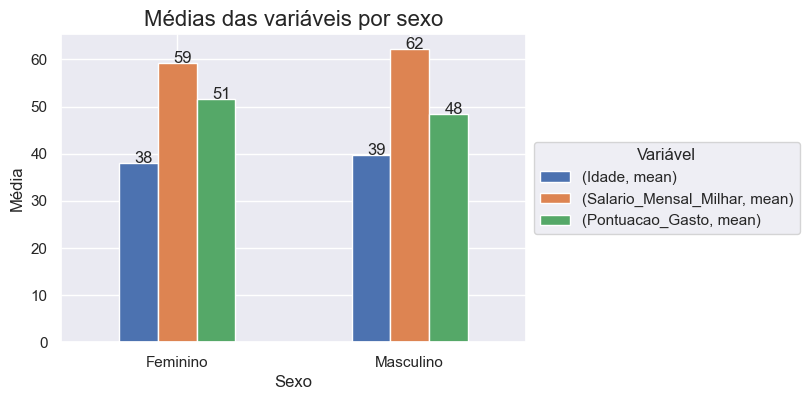

In [11]:
# Verificando a média das variáveis de acordo com o sexo

# Define o tema utilizado.
sns.set_theme(style="darkgrid")

# Criando um objeto do tipo Groupby
dfGroupbySexo = df.groupby("Sexo")

# Criando o gráfico
ax = dfGroupbySexo.aggregate([np.mean]).plot.bar()
ax.set_title("Médias das variáveis por sexo", fontsize = 16)
ax.set_ylabel("Média", fontsize = 12)
ax.legend(title="Variável",loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
plt.xticks(rotation=360)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.1
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

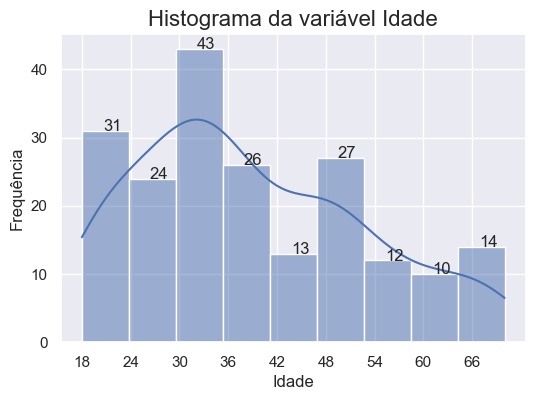

In [12]:
# Histograma da variável Idade
# Definindo o nome da variável que será analisada
variavelAnalisada = "Idade"

# Calculando a quantidade de classes da variável analisada
n = df[variavelAnalisada].count()
k = round(1+3.3*math.log10(n))

# Calculando a amplitudade da amostra 
a = max(df[variavelAnalisada])-min(df[variavelAnalisada])

# Calculando o intervalo entre as classes
# h = round(a/k)

# Melhor intervalo entre as classes após ajustes
h = 6

sns.set_theme(style="darkgrid") # Define o tema utilizado.

ax = sns.histplot(df[variavelAnalisada], bins=k, kde=True)
ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
ax.set_xlabel(variavelAnalisada, fontsize = 12)
ax.set_ylabel("Frequência", fontsize = 12)
ax.set_xticks(np.arange(min(df[variavelAnalisada]), max(df[variavelAnalisada])+1, h))
for p in ax.patches:
    _x = p.get_x() + (p.get_width()) / 2 - 0.3
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

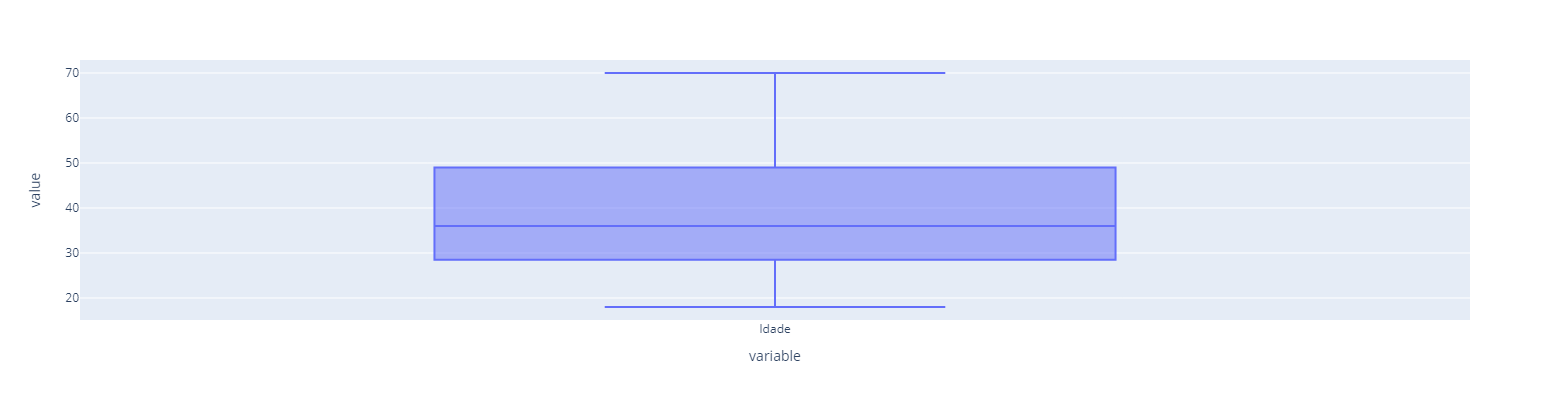

In [13]:
# Boxplot da variável idade
px.box(df,
       y=["Idade"],
       width=800, 
       height=400)

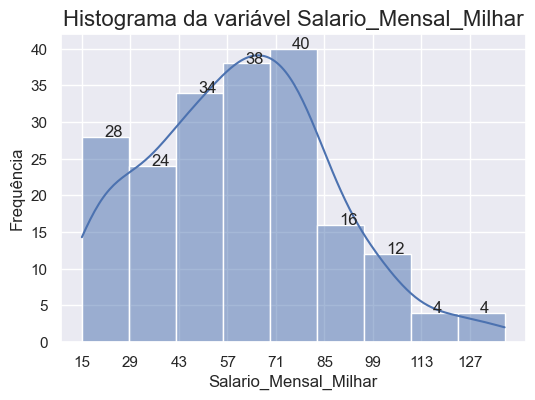

In [14]:
# Histograma da variável Salario_Mensal_Milhar
# Definindo o nome da variável que será analisada
variavelAnalisada = "Salario_Mensal_Milhar"

# Calculando a quantidade de classes da variável analisada
n = df[variavelAnalisada].count()
k = round(1+3.3*math.log10(n))

# Calculando a amplitudade da amostra 
a = max(df[variavelAnalisada])-min(df[variavelAnalisada])

# Calculando o intervalo entre as classes
h = round(a/k)

sns.set_theme(style="darkgrid") # Define o tema utilizado.

ax = sns.histplot(df[variavelAnalisada], bins=k, kde=True)
ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
ax.set_xlabel(variavelAnalisada, fontsize = 12)
ax.set_ylabel("Frequência", fontsize = 12)
ax.set_xticks(np.arange(min(df[variavelAnalisada]), max(df[variavelAnalisada])+1, h))
for p in ax.patches:
    _x = p.get_x() + (p.get_width()) / 2 - 0.3
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

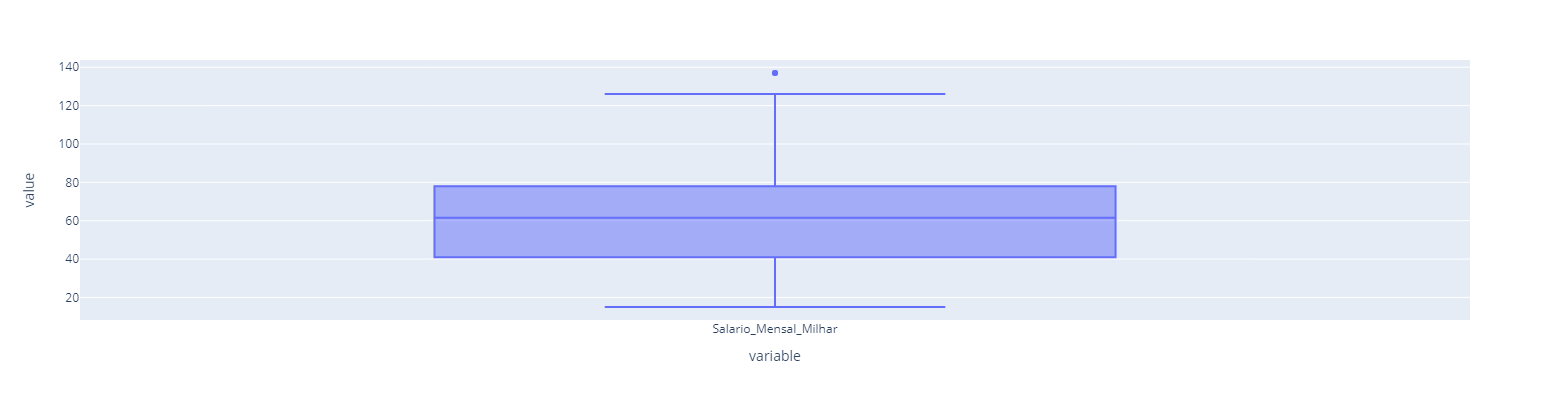

In [15]:
# Boxplot da variável Salario_Mensal_Milhar
px.box(df,
       y=["Salario_Mensal_Milhar"],
       width=800, 
       height=400)

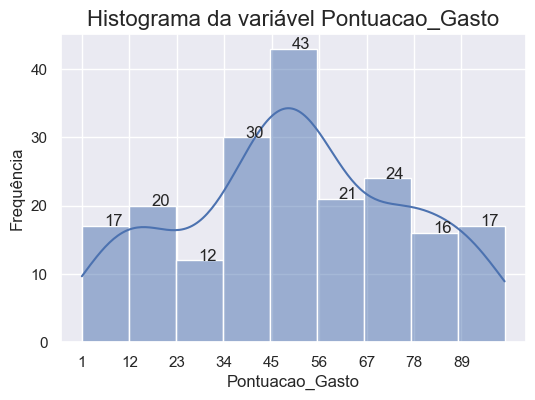

In [16]:
# Histograma da variável Pontuacao_Gasto
# Definindo o nome da variável que será analisada
variavelAnalisada = "Pontuacao_Gasto"

# Calculando a quantidade de classes da variável analisada
n = df[variavelAnalisada].count()
k = round(1+3.3*math.log10(n))

# Calculando a amplitudade da amostra 
a = max(df[variavelAnalisada])-min(df[variavelAnalisada])

# Calculando o intervalo entre as classes
h = round(a/k)

sns.set_theme(style="darkgrid") # Define o tema utilizado.

ax = sns.histplot(df[variavelAnalisada], bins=k, kde=True)
ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
ax.set_xlabel(variavelAnalisada, fontsize = 12)
ax.set_ylabel("Frequência", fontsize = 12)
ax.set_xticks(np.arange(min(df[variavelAnalisada]), max(df[variavelAnalisada])+1, h)) 
for p in ax.patches:
    _x = p.get_x() + (p.get_width()) / 2 - 0.3
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

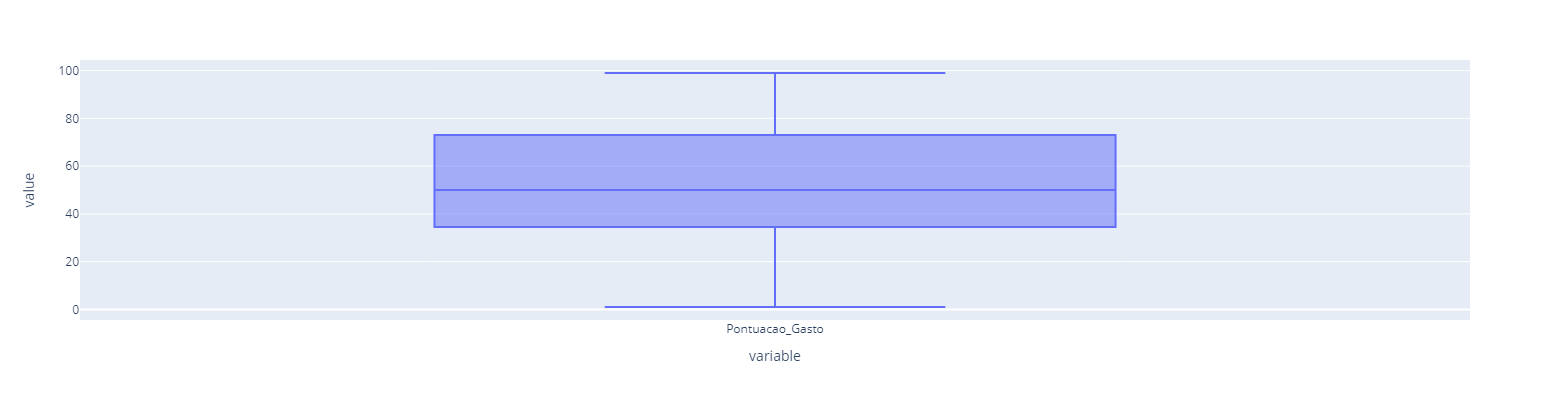

In [17]:
# Boxplot da variável Pontuacao_Gasto
px.box(df,
       y=["Pontuacao_Gasto"],
       width=800, 
       height=400)

## Seleção de variáveis

In [18]:
# Fazendo uma cópia do DataFrame
dfCopia = df.copy()

In [19]:
# Convertendo variáveis categóricas em valores numéricos (variáveis dummies)
colunasDummies = pd.get_dummies(df.Sexo)
colunasDummies

Feminino  Masculino
0       False       True
1       False       True
2        True      False
3        True      False
4        True      False
..        ...        ...
195      True      False
196      True      False
197     False       True
198     False       True
199     False       True

[200 rows x 2 columns]

In [20]:
# Concatenando DataFrames
dfCopia = pd.concat([dfCopia, colunasDummies], axis="columns")

# Excluindo a coluna Sexo
dfCopia.drop(["Sexo"], axis=1, inplace=True)
dfCopia

Idade  Salario_Mensal_Milhar  Pontuacao_Gasto  Feminino  Masculino
0       19                     15               39     False       True
1       21                     15               81     False       True
2       20                     16                6      True      False
3       23                     16               77      True      False
4       31                     17               40      True      False
..     ...                    ...              ...       ...        ...
195     35                    120               79      True      False
196     45                    126               28      True      False
197     32                    126               74     False       True
198     32                    137               18     False       True
199     30                    137               83     False       True

[200 rows x 5 columns]

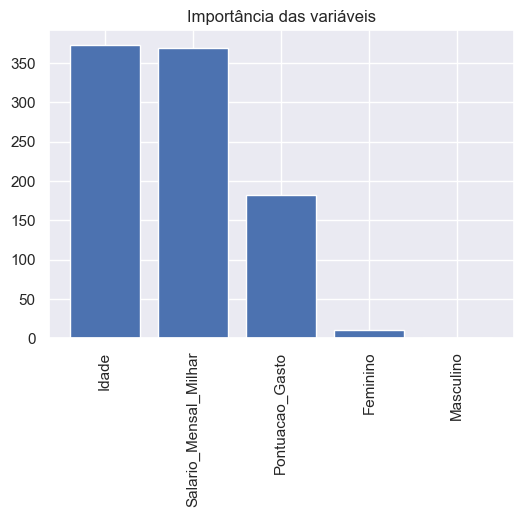

In [21]:
# Carregando o módulo
from sklearn.decomposition import PCA

# Convertendo o DataFrame para uma matriz Numpy
numeroObservacoes = len(dfCopia)
numeroVariaveis = 5
X = dfCopia[["Idade", "Salario_Mensal_Milhar", "Pontuacao_Gasto", "Feminino", "Masculino"]].values.reshape((numeroObservacoes, numeroVariaveis)) # X deve sempre ser uma matriz e nunca um vetor

# Cria o objeto PCA
pca = PCA()

# Treina o modelo e aplica a redução de dimensionalidade 
pca.fit_transform(X)

# Gráfico com o nível de importância das variáveis
variaveis = ["Idade", "Salario_Mensal_Milhar", "Pontuacao_Gasto", "Feminino", "Masculino"]
plt.bar(variaveis, pca.singular_values_)
plt.title("Importância das variáveis")
plt.xticks(rotation=90)
plt.show()

## Preparando os dados

### Dataframe mantendo os dados no formato original

In [22]:
# Retorna os valores do DataFrame e converte em uma matriz NumPy
dadosOriginais = dfCopia[["Idade", "Salario_Mensal_Milhar", "Pontuacao_Gasto"]].values
dadosOriginais

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

### Dataframe com os dados normalizados

In [ ]:
# Carregando o módulo
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Retorna os valores do DataFrame e converte em uma matriz NumPy
valores = df[["Idade", "Salario_Mensal_Milhar", "Pontuacao_Gasto"]].values

# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1
dadosNormalizados = min_max_scaler.fit_transform(valores)
dadosNormalizados

### Dataframe com os dados padronizados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Retorna os valores do DataFrame e converte em uma matriz NumPy
valores = df[["Idade", "Salario_Mensal_Milhar", "Pontuacao_Gasto"]].values

# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados.
dadosPadronizados = scaler.fit_transform(valores)
dadosPadronizados

## Selecionando a apresentação dos dados

In [24]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dados = dadosOriginais
elif apresentacaoDosDados == "Normalizados":
    dados = dadosNormalizados
else:
    dados = dadosPadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


## Avaliando a clusterização - encontrando o melhor valor de k
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

A **Inércia** é a soma das distâncias entre as observações e o centróide do cluster. A Inércia é calculada pelo algoritmo K-means. Na realidade, o algoritmo K-means tem como objetivo escolher centróides que minimizem a inércia. Por essa razão, valores mais baixos são melhores e zero é o valor ideal. Resumindo, quanto menor o valor da Inércia melhor e quanto maior pior. <br>
A métrica **Silhouette Score** é calculada com base na distância média entre as observações pertencentes ao mesmo cluster A e a distância média das observações do cluster B mais próximo para cada observação do cluster A. O melhor valor é 1 e o pior valor é -1. Valores próximos de 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma observação foi atribuída ao cluster errado. <br>
Já a métrica **Davies-Bouldin Score** é definida como a medida de similaridade média de cada cluster com seu cluster mais semelhante, onde a similaridade é a razão entre as distâncias das observações dentro do cluster e as distâncias entre os clusters. Assim, clusters mais distantes e menos dispersos resultarão em uma pontuação melhor. A pontuação mínima é zero, com valores mais baixos indicando o melhor agrupamento.
    
</details>

In [25]:
# Carregando os pacotes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

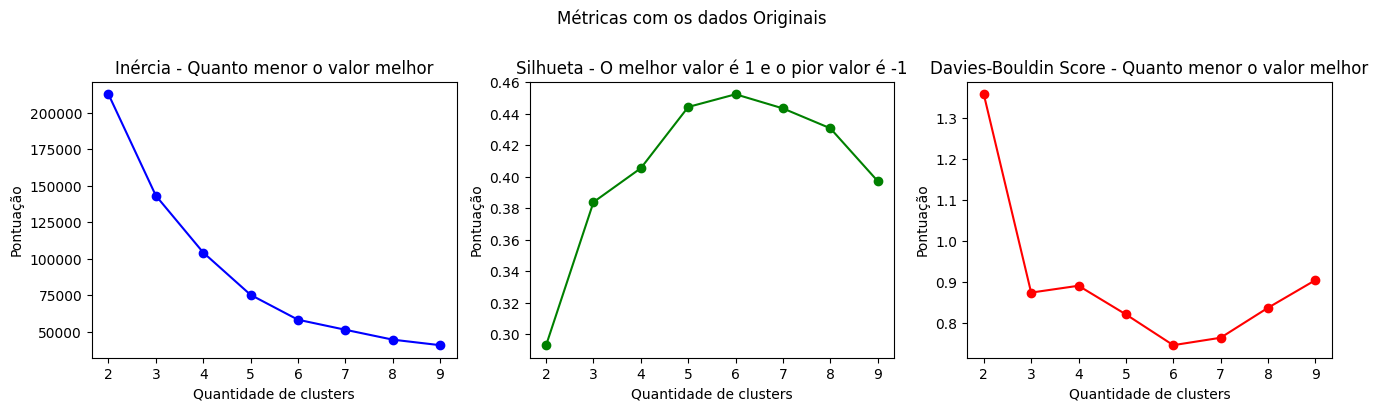

In [26]:
# Lista de valores de K
valoresDek = range(2, 10)

# Lista para as métricas
valoresInercia = []
silhueta = []
daviesBouldinScore = []

# Loop que calcula as métricas com diferentes valores de K
for K in valoresDek:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(dados)
    classes = modelo.labels_
    valoresInercia.append(modelo.inertia_)
    silhueta.append(silhouette_score(dados, classes, metric='euclidean'))
    daviesBouldinScore.append(davies_bouldin_score(dados, classes))

# Restaura a configuração padrão dos parâmetros Seaborn
sns.reset_defaults()

# Criando um gráfico 
fig, axs = plt.subplots(1, 3, figsize=(16, 4)) # Define as características do Facet

axs[0].plot(valoresDek, valoresInercia, "blue", marker = 'o')
axs[0].set_title("Inércia - Quanto menor o valor melhor", fontsize = 12)
axs[0].set_xlabel("Quantidade de clusters")
axs[0].set_ylabel("Pontuação")
axs[0].set_xticks(range(2, 10))
axs[1].plot(valoresDek, silhueta, "green", marker = "o") 
axs[1].set_title("Silhueta - O melhor valor é 1 e o pior valor é -1", fontsize = 12)
axs[1].set_xlabel("Quantidade de clusters")
axs[1].set_ylabel("Pontuação")
axs[1].set_xticks(range(2, 10))
axs[2].plot(valoresDek, daviesBouldinScore, "red", marker = "o") 
axs[2].set_title("Davies-Bouldin Score - Quanto menor o valor melhor", fontsize = 12)
axs[2].set_xlabel("Quantidade de clusters")
axs[2].set_ylabel("Pontuação")
axs[2].set_xticks(range(2, 10))
fig.suptitle("Métricas com os dados " + apresentacaoDosDados)
fig.subplots_adjust(top=0.8)
# Salvando a figura no disco
plt.savefig("Dados\Clientes\Métricas com os dados " + apresentacaoDosDados + ".png")
plt.show()

## K-means
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

K-means é um dos algoritmos de aprendizado não supervisionado mais simples. O algoritmo segue uma maneira simples e fácil de classificar um dado conjunto de dados através de um certo número de clusters definidos pelo cientista de dados. A ideia principal por trás do algoritmo é definir um centróide para cada cluster. Esses centróides são colocados de forma inteligente, pois uma localização diferente causa resultados diferentes. Então, o algoritmo coloca os centróides o mais longe possível um do outro. O próximo passo do algoritmo é pegar cada ponto de dado pertencente a um conjunto de dados e associar este ponto de dado ao centróide mais próximo. Quando nenhum ponto está pendente, a primeira etapa é concluída com um primeiro agrupamento. Neste ponto, o algoritmo calcula novos centróides como baricentros dos clusters resultantes da etapa anterior. Com esses novos centróides, uma nova ligação é feita entre os mesmos pontos de conjunto do dados e o novo centróide mais próximo. Dessa forma, é iniciado um loop e como resultado desse loop, os centróides mudam sua localização passo a passo até que não haja mais mudanças. Em outras palavras, os centróides não se movem mais.
    
</details>

In [27]:
# Criando o objeto 
kmeans = KMeans(n_clusters=6 , random_state=0)

# Treinando o modelo e fazendo as previsões dos clusters
kmeans.fit_predict(dados)

# Visualizando o cluster atribuído para cada observação
kmeans.labels_

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [28]:
# Associando cada cliente a seu respectivo grupo
dfKmeans = df.copy()
dfKmeans["Cluster"] = kmeans.labels_
dfKmeans

Sexo  Idade  Salario_Mensal_Milhar  Pontuacao_Gasto  Cluster
0    Masculino     19                     15               39        5
1    Masculino     21                     15               81        4
2     Feminino     20                     16                6        5
3     Feminino     23                     16               77        4
4     Feminino     31                     17               40        5
..         ...    ...                    ...              ...      ...
195   Feminino     35                    120               79        3
196   Feminino     45                    126               28        2
197  Masculino     32                    126               74        3
198  Masculino     32                    137               18        2
199  Masculino     30                    137               83        3

[200 rows x 5 columns]

In [30]:
# Visualizando os centróides criados pelo algoritmo
# A depender de como os dados estão apresentados será necessário trasnformá-los para o estado original
# Caso contrário, os centróides não serão visualizados corretamente no gráfico.
if apresentacaoDosDados == "Originais":
    centroides = kmeans.cluster_centers_
elif apresentacaoDosDados == "Normalizados":
    centroides = min_max_scaler.inverse_transform(kmeans.cluster_centers_)
else:
    centroides = scaler.inverse_transform(kmeans.cluster_centers_)

print(centroides)

[[27.         56.65789474 49.13157895]
 [56.15555556 53.37777778 49.08888889]
 [41.68571429 88.22857143 17.28571429]
 [32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]
 [44.14285714 25.14285714 19.52380952]]


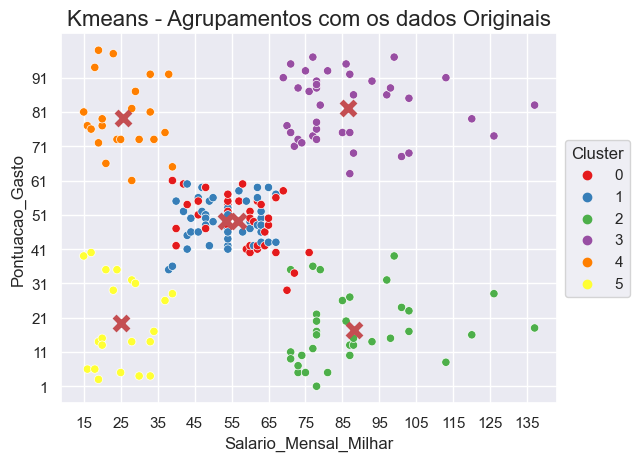

In [31]:
# Visualizando os agrupamentos

# Define o tema utilizado.
sns.set_theme(style="darkgrid")

# Criando um scatterplot 
ax = sns.scatterplot(x=dfKmeans.Salario_Mensal_Milhar, y=dfKmeans.Pontuacao_Gasto, hue=dfKmeans.Cluster, palette="Set1") # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
ax.set_title("Kmeans - Agrupamentos com os dados " + apresentacaoDosDados, fontsize = 16)
ax.set_xticks(np.arange(dfKmeans.Salario_Mensal_Milhar.min(), dfKmeans.Salario_Mensal_Milhar.max(), 10))
ax.set_yticks(np.arange(dfKmeans.Pontuacao_Gasto.min(), dfKmeans.Pontuacao_Gasto.max(), 10))
ax.legend(title="Cluster",loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
plt.scatter(centroides[:,1],  centroides[:,2], marker = 'x', color = 'r', s = 100, linewidths = 4) # centróides dos clusters
# Salvando a figura no disco
plt.savefig("Dados\Clientes\Kmeans - Agrupamentos com os dados " + apresentacaoDosDados + ".png", bbox_inches='tight')
plt.show()

## DBSCAN
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O algoritmo DBSCAN visualiza os clusters como áreas de alta densidade separadas das áreas de baixa densidade, ou seja, dado um conjunto de pontos em algum espaço, o algoritmo agrupa pontos que estão próximos (regiões de alta densidade), marcando como outliers pontos que estão sozinhos ou muito longe (regiões de baixa densidade). O algoritmo determina o número de clusters com base na densidade de uma região. <br>
Diferente do K-means, o algoritmo DBSCAN não requer que o cientista de dados defina o número de clusters, mas é necessário ajustar dois outros parâmetros: <br>
- **eps**: é a distância máxima entre dois pontos de dados a serem considerados na mesma vizinhança. O valor padrão é 0.5; <br>
- **min_samples**: é a quantidade mínima de pontos de dados em um espaço a ser considerado como um cluster. O valor padrão é 5.<br>

A implementação da biblioteca Scikit-Learn fornece um padrão para os parâmetros eps e min_samples, mas que geralmente devem ser ajustados. O algoritmo DBSCAN depende dos parâmetros eps e min_samples para descobrir qual a densidade de cada cluster.
    
</details>

In [32]:
# Carregando o módulo
from sklearn.cluster import DBSCAN

In [33]:
# Criando o modelo
dbscan = DBSCAN(eps=0.15, min_samples=15)

# Treinando o modelo e fazendo as previsões dos clusters
dbscan.fit_predict(dados)

# Visualizando o cluster de cada observação
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [34]:
# Associando cada cliente a seu respectivo grupo
dfDbscan = df.copy()
dfDbscan["Cluster"] = dbscan.labels_
dfDbscan

Sexo  Idade  Salario_Mensal_Milhar  Pontuacao_Gasto  Cluster
0    Masculino     19                     15               39       -1
1    Masculino     21                     15               81       -1
2     Feminino     20                     16                6       -1
3     Feminino     23                     16               77       -1
4     Feminino     31                     17               40       -1
..         ...    ...                    ...              ...      ...
195   Feminino     35                    120               79       -1
196   Feminino     45                    126               28       -1
197  Masculino     32                    126               74       -1
198  Masculino     32                    137               18       -1
199  Masculino     30                    137               83       -1

[200 rows x 5 columns]

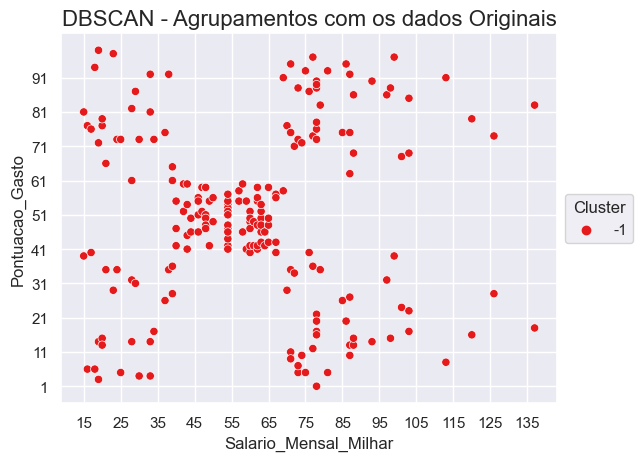

In [35]:
# Visualizando os agrupamentos
sns.set_theme(style="darkgrid") # Define o tema utilizado.

ax = sns.scatterplot(x=dfDbscan.Salario_Mensal_Milhar, y=dfDbscan.Pontuacao_Gasto, hue=dfDbscan.Cluster, palette="Set1") # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
ax.set_title("DBSCAN - Agrupamentos com os dados " + apresentacaoDosDados, fontsize = 16)
ax.set_xticks(np.arange(dfDbscan.Salario_Mensal_Milhar.min(), dfDbscan.Salario_Mensal_Milhar.max(), 10)) 
ax.set_yticks(np.arange(dfDbscan.Pontuacao_Gasto.min(), dfDbscan.Pontuacao_Gasto.max(), 10))
ax.legend(title="Cluster",loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
# Salvando a figura no disco
plt.savefig("Dados\Clientes\DBSCAN - Agrupamentos com os dados " + apresentacaoDosDados + ".png", bbox_inches='tight')
plt.show()

## Mean Shift
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Mean Shift é um algoritmo de clusterização utilizado para segmentar dados. O Mean Shift opera inicialmente definindo uma região ao redor de cada grupo de dados calculando seus respectivos centróides. De forma iterativa, o algoritmo muda o centro das regiões para cada centróide e repete esse procedimento até convergir, segmentando os dados em grupos. <br>
Não é necessário definir uma quantidade inicial de clusters com o algoritmo Mean Shift. <br>
**Principal parâmetro:** <br>
- **bandwidth:** largura de banda do algoritmo. <br>

Para calcular a largura de banda, utilizamos a função estimate_bandwidth da biblioteca Scikit-Learn. <br>
**Principal parâmetro da função estimate_bandwidth:** <br>
- **quantile:** deve ser um valor entre 0 e 1. O valor padrão 0.3, caso nenhum valor for informado. Esse parâmetro é fundamental para encontrar os clusters.

</details>


In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [37]:
# Calculando a largura de banda do algoritmo
larguraBanda = estimate_bandwidth(dados, quantile = 0.12)
larguraBanda

24.644659209359805

In [38]:
# Criando o modelo
meanShift = MeanShift(bandwidth=larguraBanda)

# Treinando o modelo e fazendo as previsões dos clusters
meanShift.fit_predict(dados)

# Visualizando o cluster de cada observação
meanShift.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [39]:
# Associando cada cliente a seu respectivo grupo
dfMeanShift = df.copy()
dfMeanShift["Cluster"] = meanShift.labels_
dfMeanShift

Sexo  Idade  Salario_Mensal_Milhar  Pontuacao_Gasto  Cluster
0    Masculino     19                     15               39        4
1    Masculino     21                     15               81        3
2     Feminino     20                     16                6        4
3     Feminino     23                     16               77        3
4     Feminino     31                     17               40        4
..         ...    ...                    ...              ...      ...
195   Feminino     35                    120               79        1
196   Feminino     45                    126               28        2
197  Masculino     32                    126               74        1
198  Masculino     32                    137               18        2
199  Masculino     30                    137               83        1

[200 rows x 5 columns]

In [40]:
# Visualizando os centróides criados pelo algoritmo
# A depender de como os dados estão apresentados será necessário trasnformá-los para o estado original
# Caso contrário, os centróides não serão visualizados corretamente no gráfico.
if apresentacaoDosDados == "Originais":
    centroides = meanShift.cluster_centers_
elif apresentacaoDosDados == "Normalizados":
    centroides = min_max_scaler.inverse_transform(meanShift.cluster_centers_)
else:
    centroides = scaler.inverse_transform(meanShift.cluster_centers_)

print(centroides)

[[37.83076923 54.66153846 49.44615385]
 [32.57142857 82.25714286 82.17142857]
 [44.55555556 83.88888889 17.62962963]
 [24.72       29.76       73.68      ]
 [47.63157895 27.31578947 19.        ]]


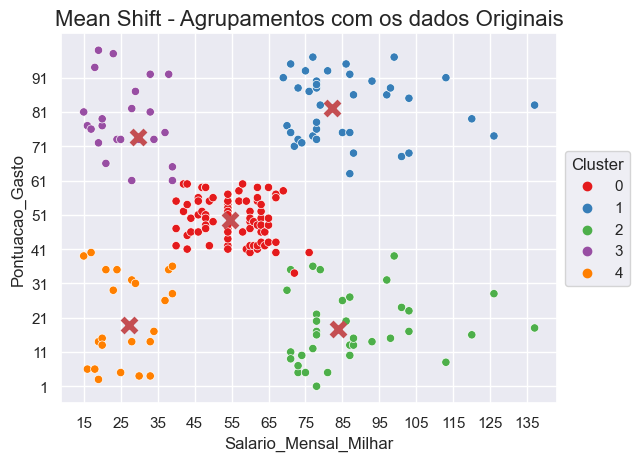

In [41]:
# Visualizando os agrupamentos
sns.set_theme(style="darkgrid") # Define o tema utilizado.

ax = sns.scatterplot(x=dfMeanShift.Salario_Mensal_Milhar, y=dfMeanShift.Pontuacao_Gasto, hue=dfMeanShift.Cluster, palette="Set1") # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
ax.set_title("Mean Shift - Agrupamentos com os dados " + apresentacaoDosDados, fontsize = 16)
ax.set_xticks(np.arange(dfMeanShift.Salario_Mensal_Milhar.min(), dfMeanShift.Salario_Mensal_Milhar.max(), 10)) 
ax.set_yticks(np.arange(dfMeanShift.Pontuacao_Gasto.min(), dfMeanShift.Pontuacao_Gasto.max(), 10))
ax.legend(title="Cluster",loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
plt.scatter(centroides[:,1],  centroides[:,2], marker = 'x', color = 'r', s = 100, linewidths = 4) # centróides dos clusters
# Salvando a figura no disco
plt.savefig("Dados\Clientes\Mean Shift - Agrupamentos com os dados " + apresentacaoDosDados + ".png", bbox_inches='tight')
plt.show()

# Explorando os dados após a clusterização

In [42]:
# Analisar os dados setando a variável "Cluster" como índice
dfGroupby = dfKmeans.groupby("Cluster")

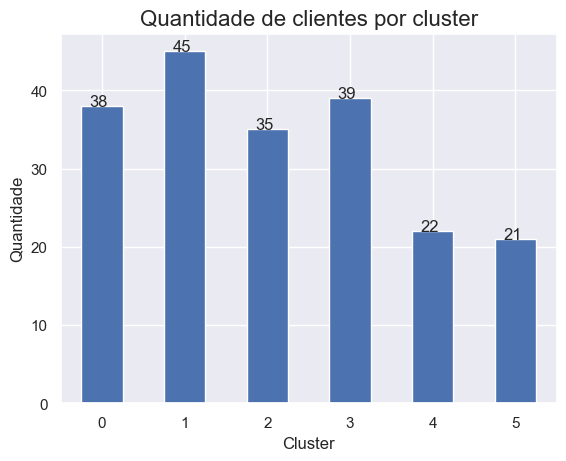

In [43]:
# Verificando a quantidade de clientes por cluster

sns.set_theme(style="darkgrid") # Define o tema utilizado.
ax = dfGroupby["Cluster"].size().plot.bar()
ax.set_title("Quantidade de clientes por cluster", fontsize = 16)
ax.set_ylabel("Quantidade", fontsize = 12)
plt.xticks(rotation=360)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

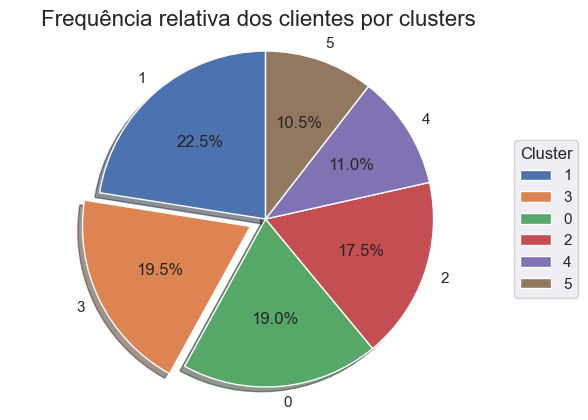

In [44]:
# Verificando a frequência relativa dos clientes por cluster
friCluster = (dfKmeans.Cluster.value_counts() / dfKmeans.Cluster.count())*100 # Calcula a frequência relativa para cada cluster
listaDeClusters = friCluster.index # Salva a lista de clusters
explode = (0, 0.1, 0, 0, 0, 0)  # "explode" somente a segunda fatia

fig, ax = plt.subplots()
ax.pie(friCluster, explode=explode, labels=listaDeClusters, autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title("Frequência relativa dos clientes por clusters", fontsize = 16)
ax.legend(title="Cluster",loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
plt.show()

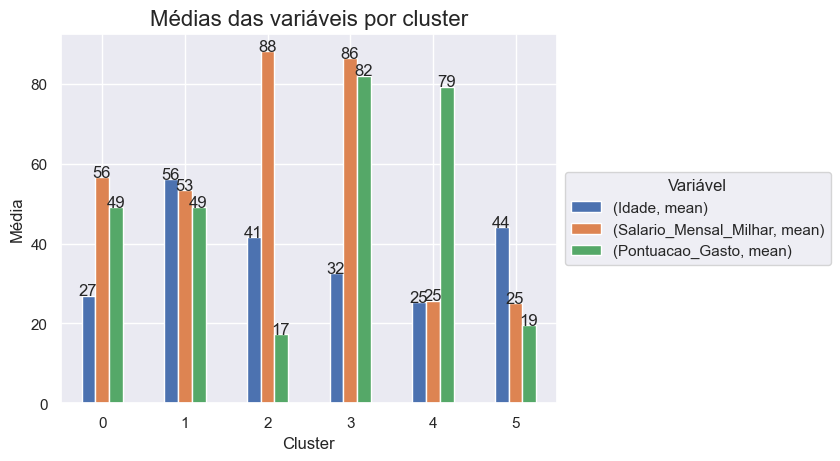

In [45]:
# Verificando a média de cada uma das variáveis de acordo com o cluster
sns.set_theme(style="darkgrid") # Define o tema utilizado.

# Calcula a mádia das variáveis e cria o gráfico
ax = dfGroupby[["Idade", "Salario_Mensal_Milhar", "Pontuacao_Gasto"]].aggregate([np.mean]).plot.bar()
ax.set_title("Médias das variáveis por cluster", fontsize = 16)
ax.set_ylabel("Média", fontsize = 12)
ax.legend(title="Variável",loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
plt.xticks(rotation=360)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.2
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [46]:
# Verificando o valor mínimo e máximo para cada variável de acordo com o cluster
dfMinMax = dfGroupby.aggregate([np.min, np.max])
dfMinMax.drop(["Sexo"], axis=1, inplace=True)
dfMinMax

Idade      Salario_Mensal_Milhar      Pontuacao_Gasto     
         amin amax                  amin amax            amin amax
Cluster                                                           
0          18   40                    39   76              29   61
1          43   70                    38   67              35   60
2          19   59                    71  137               1   39
3          27   40                    69  137              63   97
4          18   35                    15   39              61   99
5          19   67                    15   39               3   40

In [47]:
# Analisar os dados setando as variáveis "Cluster" e "Sexo" como índice
dfGroupby2 = dfKmeans.groupby(["Cluster", "Sexo"])
dfGroupby2.size()

Cluster  Sexo     
0        Feminino     25
         Masculino    13
1        Feminino     25
         Masculino    20
2        Feminino     15
         Masculino    20
3        Feminino     21
         Masculino    18
4        Feminino     13
         Masculino     9
5        Feminino     13
         Masculino     8
dtype: int64

In [48]:
# Convertendo para DataFrame
dfClusterSexo = pd.DataFrame(dfGroupby2.size())
dfClusterSexo.reset_index(inplace = True)
dfClusterSexo.columns = ["Cluster", "Sexo", "Quantidade"]
dfClusterSexo

Cluster       Sexo  Quantidade
0         0   Feminino          25
1         0  Masculino          13
2         1   Feminino          25
3         1  Masculino          20
4         2   Feminino          15
5         2  Masculino          20
6         3   Feminino          21
7         3  Masculino          18
8         4   Feminino          13
9         4  Masculino           9
10        5   Feminino          13
11        5  Masculino           8

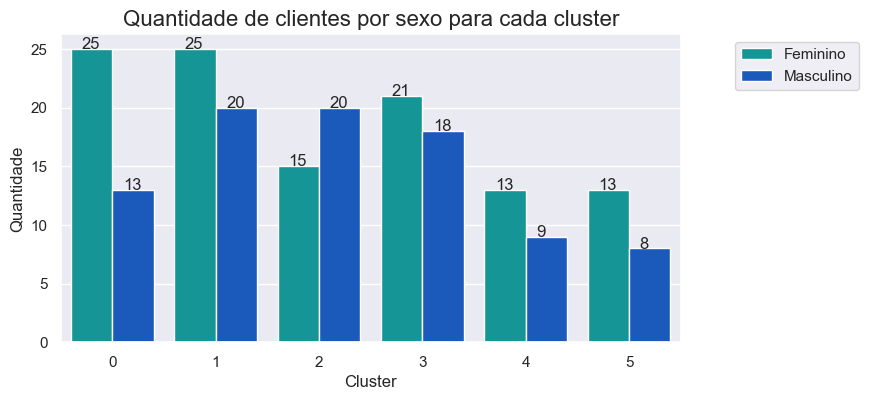

In [49]:
# Verificando a quantidade de clientes por sexo para cada cluster
sns.set_theme(style="darkgrid") # Define o tema utilizado.
sns.set(rc = {'figure.figsize':(8,4)}) # define o tamanho do gráfico

ax = sns.barplot(x=dfClusterSexo.Cluster, y=dfClusterSexo.Quantidade, hue=dfClusterSexo["Sexo"], palette="winter_r", errorbar=None) # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
ax.set_title("Quantidade de clientes por sexo para cada cluster", fontsize = 16)
ax.legend(bbox_to_anchor=(0.8, 0., 0.5, 1.)) # exibe a legenda
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.3
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

# Salvando, carregando e utilizando o modelo criado

In [50]:
# Selecionando o modelo final
modeloFinal = kmeans
modeloFinal

KMeans(n_clusters=6, random_state=0)

## Salvando o modelo
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O módulo **pickle** implementa protocolos binários para serializar e desserilizar um objeto Python. **Pickling** é o processo pelo qual um objeto Python é convertido em um fluxo de bytes, e **unpickling** é a operação inversa, pela qual um fluxo de bytes de um arquivo binário ou objeto semelhante a bytes é convertido novamente em um objeto.

</details>

In [51]:
# Carregando o módulo
import pickle

In [52]:
# Salvando o modelo
arquivo = 'Dados/Clientes/modeloClusterizacaoFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


## Utilizando o modelo

In [53]:
# Atribuindo valores às variáveis  
idade = 42
salario = 81
pontuacao = 75

# Criando um cliente
cliente = np.array([idade, salario, pontuacao])
cliente

array([42, 81, 75])

In [54]:
# Carregando o modelo
modeloClusterizacao = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")

Modelo carregado!


In [55]:
# Prevendo a qual grupo o novo cliente pertence
modeloClusterizacao.predict(cliente.reshape(1,-1))

array([3])